# Project 2 on the Global YouTube statistics

Team -
1. Shubhra Saumya
2. Mrunalini Wawse
3. Aimen Anwar


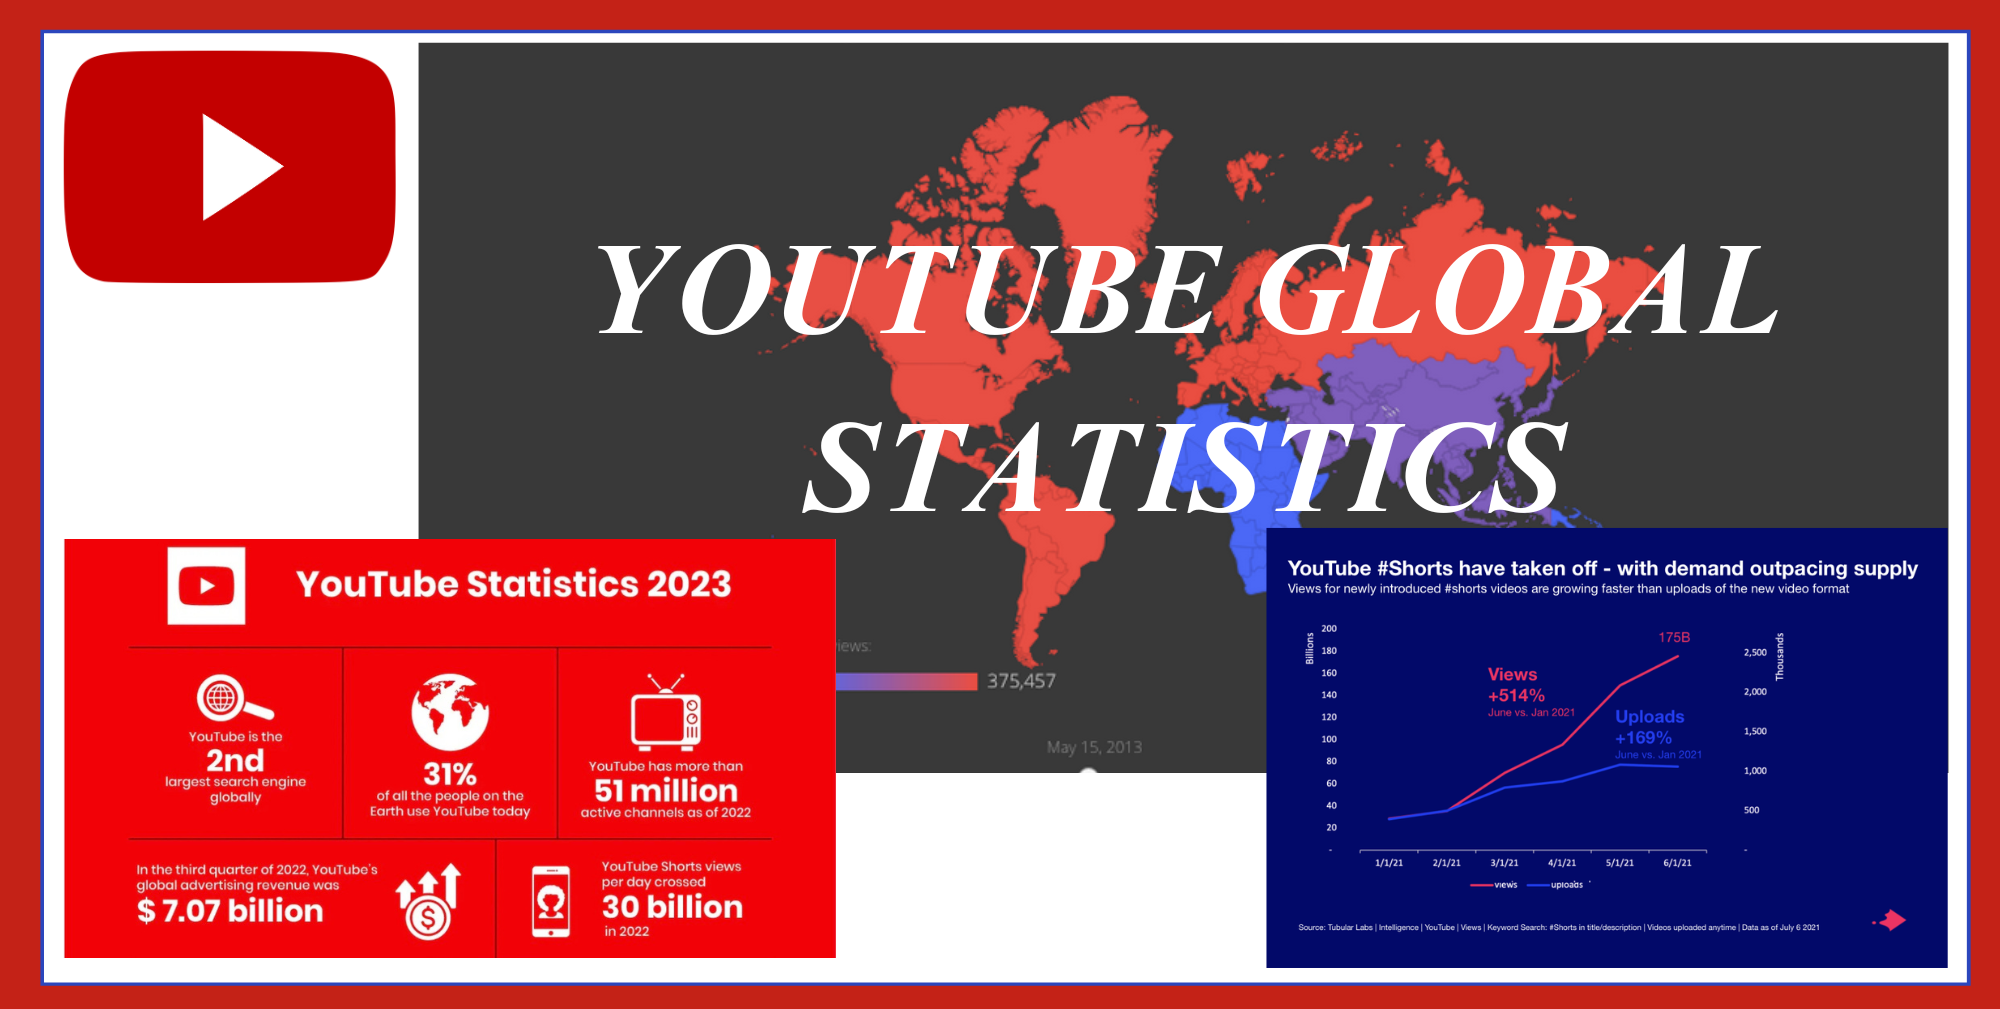

# Objective of the proposed data


The objective of this proposed data is to perform a comprehensive analysis by using Clustering Algorithms via dendrograms and KNN function for analysing Global YouTube Data to gain insights into the content trends by the consumers and how various factors impact the performance of YouTube.
The primary Stakeholder for this project will be Digital media marketing Agency that specializes in content creation and makes strategies for its clients for maximum optimization of the platform.
By conducting this analysis, the agency will provide its clients with data-driven recommendations and enable YouTube marketing campaigns thereby enhancing the quality and reach of the content online, ultimately improving online presence and profit maximization.
This project will help the digital marketing agencies in several ways-
1.	Identifying the popular content among YouTubers globally
2.	Tailoring content to attract large audience
3.	Providing insights of the videos and clips i.e- likes, subscribers/followers
4.	Engaging the audience by user centric content
5.	Categorizing the videos, length of the clip, thereby enabling data-driven decision to boost client’s YouTube performance and generating revenue.

YouTube is a powerful platform for digital marketing, and understanding the landscape of YouTube influencers and the market trends, consumer preferences is essential for our agency. We have analyzed data from 995 YouTubers, taking into account their subscribers and video views, among other features like their geographical location (Country), population, earnings etc.


In [106]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [54]:
YT_data = pd.read_csv("Global.csv")


## Data Exploration

### To explore the dataset:

##### For the data exploration we first took ten rows from the dataset which gives informations about different youtube channels which includes subscriber, views and other categories.
##### Secondly we calculated that total number of columns and row in the dataset.
##### Thirdly to find the accurate result and what does data describes we found its summary using the code so that we can get the summary of the dataset as dataset is long.
##### We also found the index of the dataset that what are the names of the columns that are in the dataset to see which columns are necessary for our research.
##### We checked the all the null values that how many null values are in the different columns of the dataset so that for the accurate result we can remove those rows and get the perfect result for our research.
##### Lastly we found out the hightest monthly earning of the top 10 youtubers which has been taken after cleaning the dataset with the following information given in the dataset.


In [55]:
#Displaying First 10 rows for the given data using function head.
YT_data.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [56]:
#Display the number of rows and columns for the given dataset.
nos_rows,nos_cols=YT_data.shape
print( f"Number of Rows: {nos_rows}")
print( f"Number of Columns: {nos_cols}")


Number of Rows: 995
Number of Columns: 28


In [57]:
#Displays the summary statistics and percentiles for the numerical columns in the dataset which gives us insights into the distribution of the data.
summary=YT_data.describe()
summary

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [58]:
#Display the column names.
YT_data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [59]:
# Finding null columns in the data
YT_data.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

# Data Cleaning

Data cleaning is a task that identifies incorrect, incomplete, inaccurate, or irrelevant data, fixes the problems, and ensures that all such issues will be resolved automatically.

Datasets usually contain large volumes of data that may be stored in formats that are not easy to use. That’s why data scientists need first to make sure that data is correctly formatted and conforms to the set of rules.

In [60]:
YT_data_cleaned = YT_data.dropna()
summary=YT_data_cleaned.describe()
summary

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,554.000000,5.540000e+02,5.540000e+02,554.000000,5.540000e+02,554.000000,554.000000,5.540000e+02,554.000000,5.540000e+02,...,5.540000e+02,5.540000e+02,554.000000,554.000000,554.000000,5.540000e+02,554.000000,5.540000e+02,554.000000,554.000000
mean,463.828520,2.462401e+07,1.310608e+10,14758.036101,1.297121e+05,180.850181,238.034296,2.387087e+08,52604.206895,8.409689e+05,...,1.009984e+07,3.431256e+05,2012.492780,15.259928,60.533574,4.965559e+08,8.866029,2.402031e+08,25.887766,-5.850585
std,289.929893,1.950924e+07,1.729334e+10,44248.913413,6.815954e+05,732.093496,937.109139,4.862804e+08,76120.564578,1.216598e+06,...,1.461488e+07,5.881429e+05,4.468591,8.771828,26.365440,5.178813e+08,4.813768,1.641213e+08,20.251021,84.737945
min,1.000000,1.230000e+07,2.634000e+03,1.000000,1.000000e+00,1.000000,1.000000,3.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,206.500000,1.490000e+07,5.102920e+09,436.500000,2.222500e+02,10.000000,19.000000,4.906325e+07,11625.000000,1.862750e+05,...,2.200000e+06,1.000000e+05,2009.000000,8.000000,28.100000,1.023202e+08,5.360000,5.770569e+07,20.593684,-95.712891
50%,448.500000,1.880000e+07,9.040989e+09,1278.000000,5.695000e+02,40.500000,48.000000,1.150635e+08,28250.000000,4.521000e+05,...,5.400000e+06,2.000000e+05,2013.000000,15.000000,60.000000,3.282395e+08,5.560000,2.706630e+08,29.843491,-3.435973
75%,702.750000,2.670000e+07,1.540470e+10,4142.500000,1.580500e+03,104.750000,114.500000,2.380330e+08,58825.000000,9.414000e+05,...,1.127500e+07,4.000000e+05,2015.750000,22.000000,88.200000,1.366418e+09,14.700000,4.710315e+08,37.090240,78.962880
max,995.000000,2.450000e+08,2.280000e+11,301308.000000,4.054962e+06,7683.000000,7670.000000,6.589000e+09,576000.000000,9.200000e+06,...,1.106000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.524010,138.252924


In [61]:
data_cleaned = YT_data_cleaned.drop(['Latitude', 'Longitude','Abbreviation'], axis=1)


In [62]:
data_cleaned.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,...,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,Music,1.0,...,6800000.0,108400000.0,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,Entertainment,48.0,...,4000000.0,64700000.0,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2.0,...,5900000.0,94800000.0,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,Entertainment,3.0,...,5500000.0,87500000.0,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,People,630.0,...,146800.0,2300000.0,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,Entertainment,8.0,...,1700000.0,27900000.0,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0
10,11,Zee Music Company,96700000,5.785629e+10,Music,Zee Music Company,8548,India,Music,12.0,...,2400000.0,38600000.0,1100000.0,2014.0,Mar,12.0,28.1,1.366418e+09,5.36,471031528.0
11,12,WWE,96000000,7.742847e+10,Sports,WWE,70127,United States,Sports,7.0,...,2100000.0,34300000.0,600000.0,2007.0,May,11.0,88.2,3.282395e+08,14.70,270663028.0
13,14,BLACKPINK,89800000,3.214460e+10,People & Blogs,BLACKPINK,543,South Korea,Music,32.0,...,1500000.0,23900000.0,700000.0,2016.0,Jun,29.0,94.3,5.170910e+07,4.15,42106719.0
15,16,Sony SAB,83000000,1.010000e+11,Shows,Sony SAB,71270,India,Entertainment,4.0,...,5000000.0,79600000.0,1100000.0,2007.0,Aug,4.0,28.1,1.366418e+09,5.36,471031528.0


In [63]:
# Checking for the highest earning youtuber from the given dataset
highest_earnings = data_cleaned.nlargest(10, 'highest_monthly_earnings')
highest_earnings[['Youtuber', 'video views', 'category','highest_monthly_earnings','highest_yearly_earnings','created_year','created_month', 'created_date']]

,Youtuber,video views,category,highest_monthly_earnings,highest_yearly_earnings,created_year,created_month,created_date
417,DaFuq!?Boom!,7.906182e+09,Film & Animation,9200000.0,110600000.0,2016.0,Jun,6.0
0,T-Series,2.280000e+11,Music,9000000.0,108400000.0,2006.0,Mar,13.0
3,Cocomelon - Nursery Rhymes,1.640000e+11,Education,7900000.0,94800000.0,2006.0,Sep,1.0
4,SET India,1.480000e+11,Shows,7300000.0,87500000.0,2006.0,Sep,20.0
21,Zee TV,7.313905e+10,Entertainment,6800000.0,81900000.0,2005.0,Dec,11.0
139,StarPlus,2.680067e+10,Entertainment,6700000.0,80000000.0,2006.0,May,19.0
15,Sony SAB,1.010000e+11,Shows,6600000.0,79600000.0,2007.0,Aug,4.0
83,GR6 EXPLODE,2.515423e+10,Music,6500000.0,78500000.0,2014.0,Aug,5.0
798,ViralHog,1.891769e+10,People & Blogs,5500000.0,65500000.0,2014.0,Aug,22.0
2,MrBeast,2.836884e+10,Entertainment,5400000.0,64700000.0,2012.0,Feb,20.0


#### This heatmap describes the the correlation between average of the values according to different countries in the dataset. It is useful because it gives us the insights into the global trends.

<ipython-input-64-951bebe7165f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  geographical_data = data_cleaned.groupby('Country').mean()


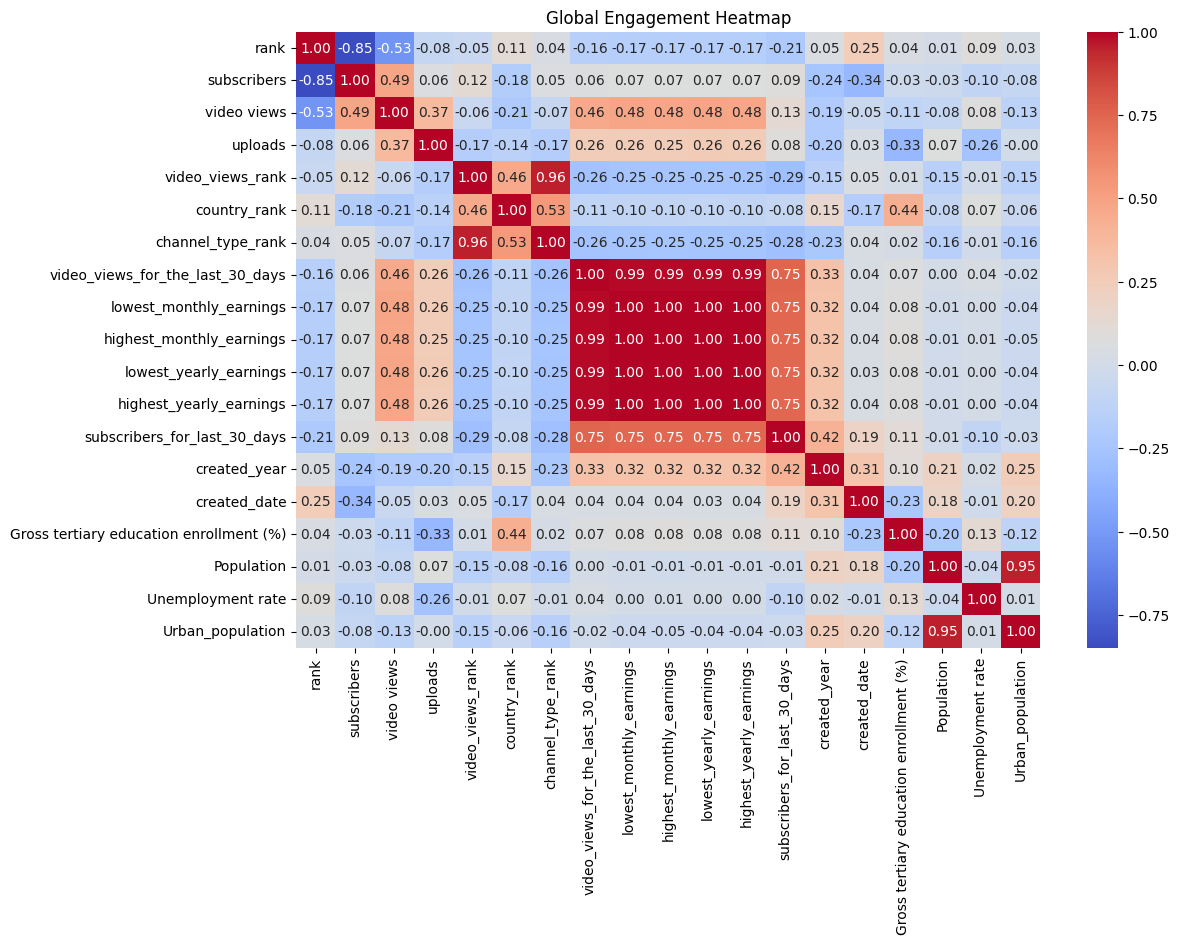

In [64]:
#coorelation matrix plot
geographical_data = data_cleaned.groupby('Country').mean()
plt.figure(figsize=(12, 8))
sns.heatmap(geographical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Global Engagement Heatmap')
plt.show()

# Data Adaptation

#### We added the new column in the dataset so that we get to know the engagement rate to check the sum of subscribers and no of views engagement level.

In [65]:
#Adding 2 columns - video engagement = subscribers + uploads / number of views
engagement_level = data_cleaned['engagement_rate'] = (data_cleaned['subscribers'] + data_cleaned['uploads']) / data_cleaned['video views']
engagement_level

0      0.001075
2      0.005852
3      0.000988
4      0.001075
8      0.001172
         ...   
989    0.001773
990    0.001362
991    0.007347
993    0.032877
994    0.005775
Length: 554, dtype: float64

#### The new column that is added is percenrage of growth rate of subscribers for over the previous 30 years.By adding this column we will get to know te popularity and growth of the channels. We used formula (Subscribers for the Last 30 Days / Subscribers) * 100 = Subscribers Growth Rate

In [66]:
# Calculate Subscribers Growth Rate
subscriber_growth = data_cleaned['Subscribers Growth Rate'] = (data_cleaned['subscribers_for_last_30_days'] / data_cleaned['subscribers']) * 100
subscriber_growth

0      0.816327
2      4.819277
3      0.617284
4      0.628931
8      0.094340
         ...   
989    0.806452
990    5.691057
991    2.439024
993    0.813008
994    0.813008
Length: 554, dtype: float64

In [67]:
data_cleaned.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,engagement_rate,Subscribers Growth Rate
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,Music,1.0,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,0.001075,0.816327
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,Entertainment,48.0,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,0.005852,4.819277
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2.0,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,0.000988,0.617284
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,Entertainment,3.0,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,0.001075,0.628931
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,People,630.0,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,0.001172,0.094340
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,Entertainment,8.0,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,0.001281,0.606673
10,11,Zee Music Company,96700000,5.785629e+10,Music,Zee Music Company,8548,India,Music,12.0,...,1100000.0,2014.0,Mar,12.0,28.1,1.366418e+09,5.36,471031528.0,0.001672,1.137539
11,12,WWE,96000000,7.742847e+10,Sports,WWE,70127,United States,Sports,7.0,...,600000.0,2007.0,May,11.0,88.2,3.282395e+08,14.70,270663028.0,0.001241,0.625000
13,14,BLACKPINK,89800000,3.214460e+10,People & Blogs,BLACKPINK,543,South Korea,Music,32.0,...,700000.0,2016.0,Jun,29.0,94.3,5.170910e+07,4.15,42106719.0,0.002794,0.779510
15,16,Sony SAB,83000000,1.010000e+11,Shows,Sony SAB,71270,India,Entertainment,4.0,...,1100000.0,2007.0,Aug,4.0,28.1,1.366418e+09,5.36,471031528.0,0.000822,1.325301


In [68]:
Global = data_cleaned

# Visualization

#### This bar chart will display the YouTubers with the highest number of subscribers all over the country, allowing us to see the subscribers distribution of the video categories.

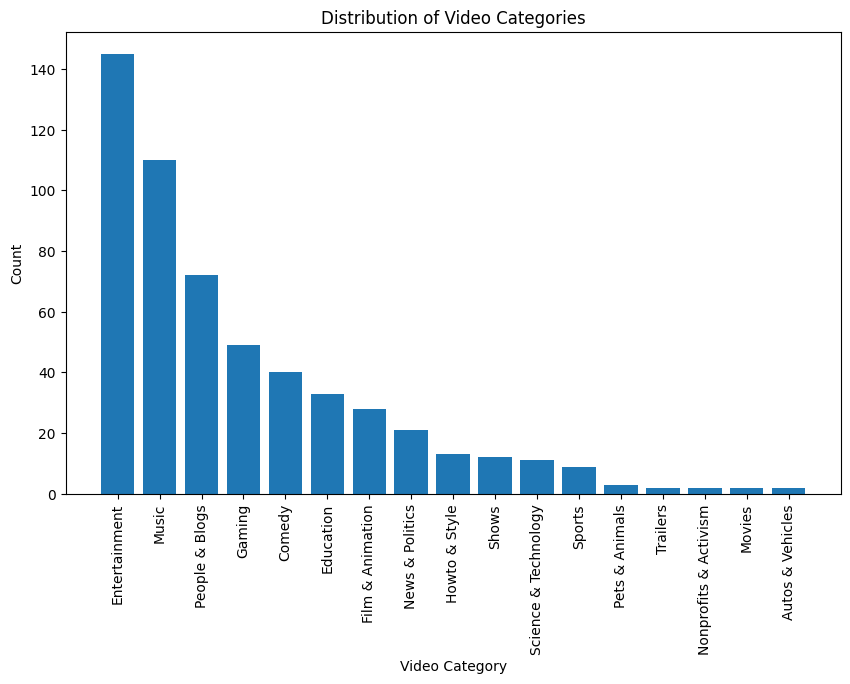

In [69]:
category_country = data_cleaned['category'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(category_country.index, category_country.values)
plt.xlabel('Video Category')
plt.ylabel('Count')
plt.title('Distribution of Video Categories')
plt.xticks(rotation=90)
plt.show()

#### This scatter plot shows the link between number of subscriber with their video views. This will help in identifying the correlation.





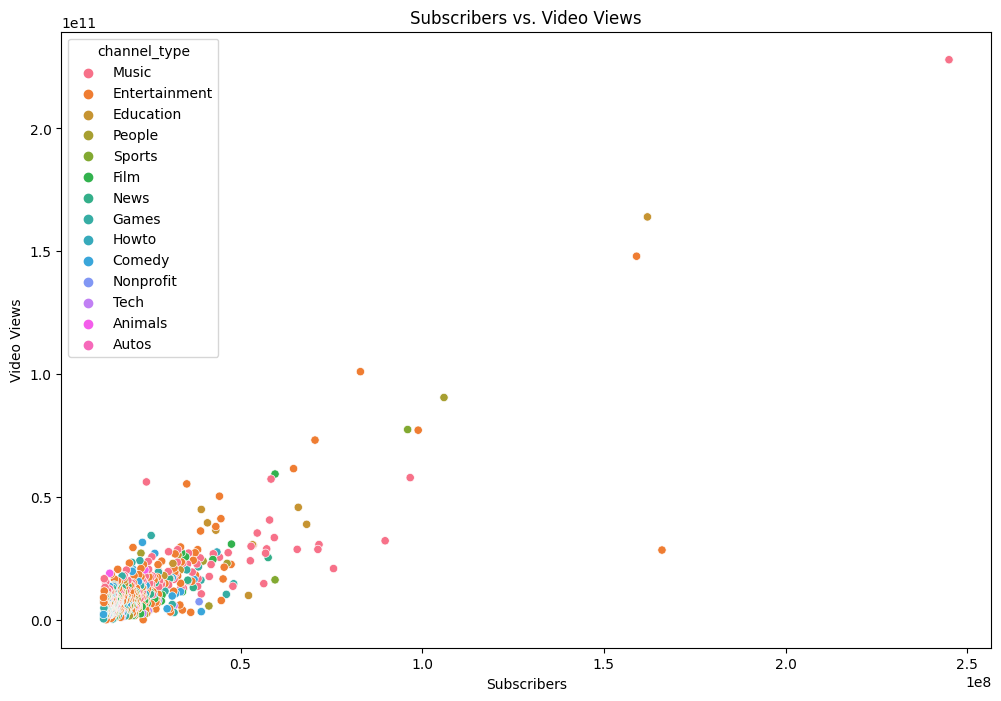

In [70]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='subscribers', y='video views', data=data_cleaned, hue='channel_type')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.title('Subscribers vs. Video Views')
plt.show()


#### This boxplot displays the distribution of the growth for different subscribers which are across the various channels.By doing thos we will get the growth rate that varies with different content type.

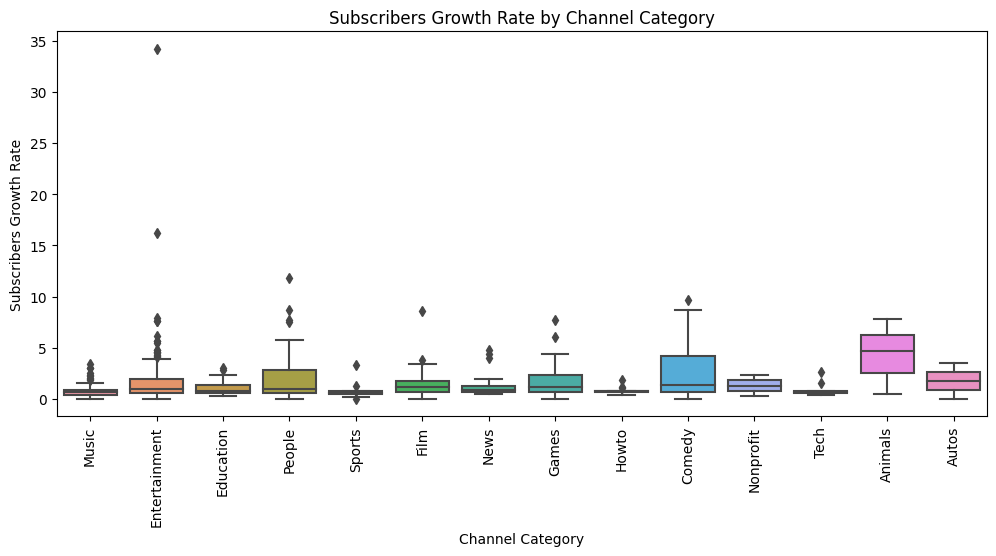

In [71]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='channel_type', y='Subscribers Growth Rate', data=data_cleaned)
plt.xticks(rotation=90)
plt.xlabel('Channel Category')
plt.ylabel('Subscribers Growth Rate')
plt.title('Subscribers Growth Rate by Channel Category')
plt.show()

#### This histogram shows that the distribution of video uploada around the channels that provide the knowledge of the active status of different content.

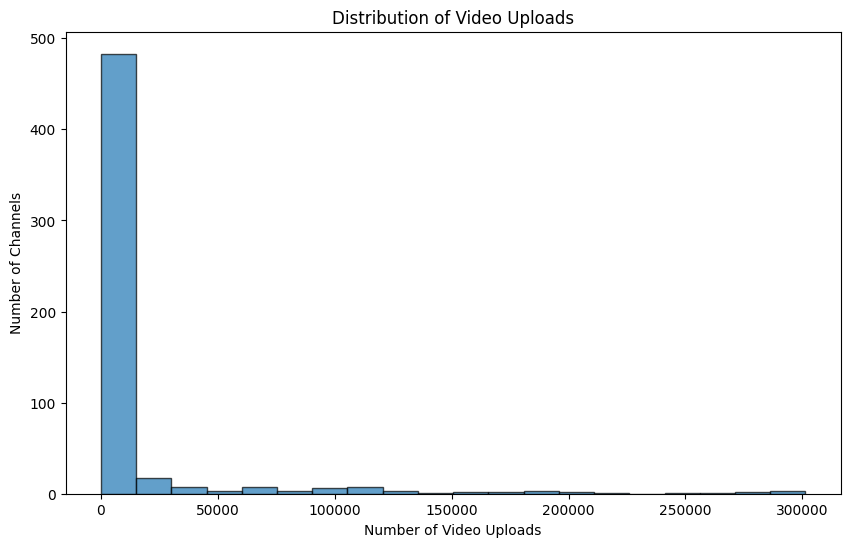

In [72]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['uploads'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Number of Video Uploads')
plt.ylabel('Number of Channels')
plt.title('Distribution of Video Uploads')
plt.show()

In this bar graph, the X-axis represents Number of videos uploaded and the Y-axis represents Number of channels on youtube.

# Cluster Analysis

It is a statistical method for processing a data by organizing the data items into groups or clusters based on how closely associated they are.

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  created_year  created_month  created_date  \
0           IN          Music  ...        2006.0            Mar        

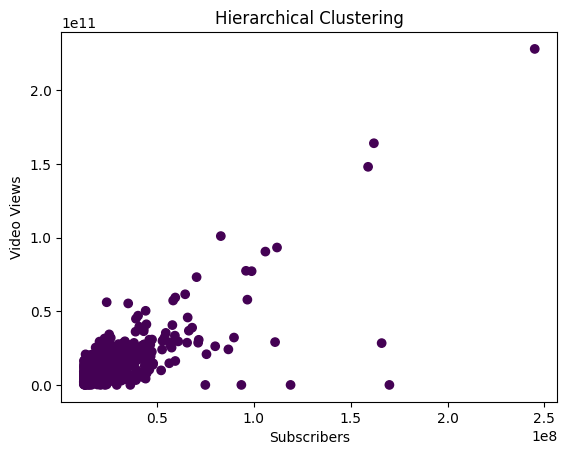

Number of Clusters at Each Iteration: [1]


In [73]:
# Load the global YouTube statistics dataset
Global_df = pd.read_csv('Global.csv')

# Select relevant columns for clustering, e.g., subscribers and video views
data = Global_df[['subscribers', 'video views']]

# Specify the desired number of clusters
desired_clusters = 3

# Calculate the pairwise distances between data points
distances = pdist(data)

# Initialize the linkage matrix using the agglomeration method (complete linkage)
linkage_matrix = linkage(distances, method='complete')

# List to store the number of clusters at each iteration
num_clusters_history = []

# Iterate until the desired number of clusters is reached
while len(num_clusters_history) == 0 or num_clusters_history[-1] > desired_clusters:
    # Cut the dendrogram at a certain height to form clusters
    threshold = linkage_matrix[-1, 2] + 1e-5  # Slight adjustment to avoid precision issues
    clusters = fcluster(linkage_matrix, threshold, criterion='distance')

    # Get the number of clusters
    num_clusters = len(np.unique(clusters))

    # Store the number of clusters for this iteration
    num_clusters_history.append(num_clusters)

    # Merge the two clusters with the closest linkage
    linkage_matrix = linkage_matrix[:-1]  # Remove the last row (highest linkage)

# Assign the final cluster labels to the original dataset
Global_df['cluster'] = clusters

# Print the resulting dataset with cluster labels
print(Global_df.head())

# Visualize the clusters
plt.scatter(Global_df['subscribers'], Global_df['video views'], c=Global_df['cluster'], cmap='viridis')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.title('Hierarchical Clustering')
plt.show()

# Print the number of clusters at each iteration
print("Number of Clusters at Each Iteration:", num_clusters_history)


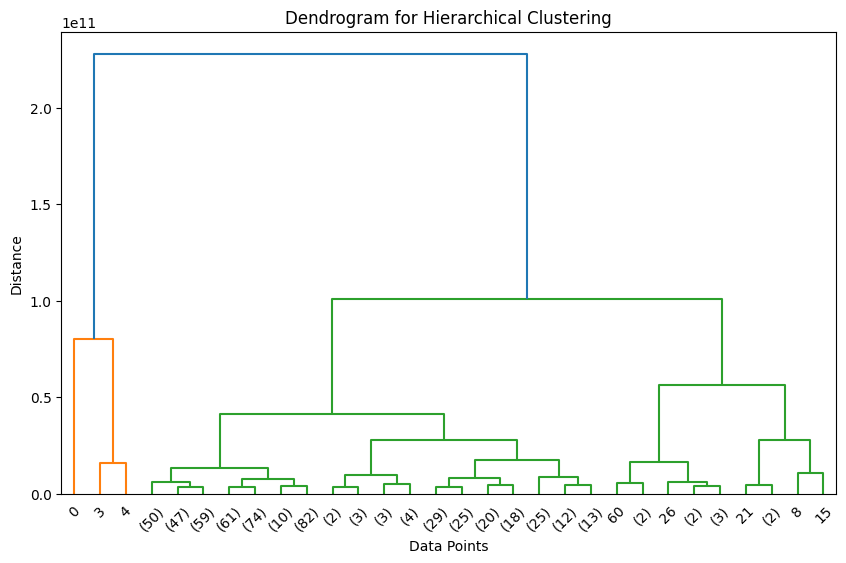

In [81]:
# Select relevant columns for clustering, e.g., subscribers and video views
data = Global[['subscribers', 'video views']]

# Calculate the pairwise distances between data points
distances = pdist(data)

# Initialize the linkage matrix using the agglomeration method (complete linkage)
linkage_matrix = linkage(distances, method='complete')

# Create the dendrogram
plt.figure(figsize=(10,6))
dendrogram(linkage_matrix, truncate_mode='lastp', labels=Global.index, orientation='top')
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In the dendogram above, each data point is represented as a leaf on the dendogram. the verticle lines connecting them depicts how they merge into clusters for the algorithm. This is a useful technique for segmenting and organizing groups of data points and making it easier to read the useful data in clusters thereby establishing a pattern. The two key features are "Subscribers" and "vidoe views" which were selected for clustering.

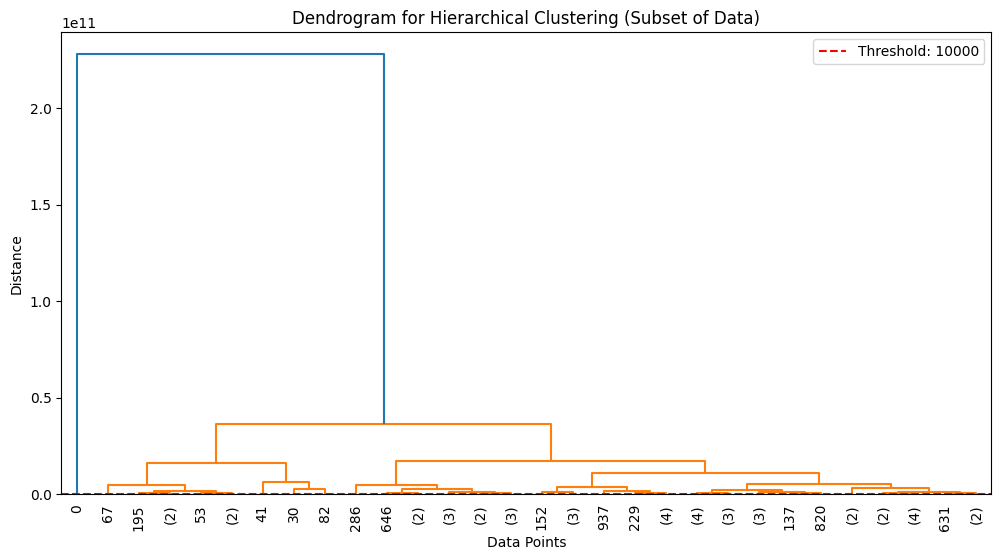

In [85]:
# Select relevant columns for clustering, e.g., subscribers and video views
data = Global[['subscribers', 'video views']]

# Choose a subset of data points (e.g., every 10th data point)
subset_data = data[::10]  # Adjust the step value as needed

# Calculate the pairwise distances for the subset
distances = pdist(subset_data)

# Initialize the linkage matrix using the agglomeration method (complete linkage)
linkage_matrix = linkage(distances, method='complete')

# Create the dendrogram
plt.figure(figsize=(12, 6))  # Adjust the figure size for better visibility
dendrogram(linkage_matrix, truncate_mode='lastp', labels=subset_data.index, orientation='top')

# Rotate X-axis labels to prevent overlap
plt.xticks(rotation=90)

# Set a threshold height to prune the dendrogram
threshold = 10000  # Adjust the threshold height as needed
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')

plt.title('Dendrogram for Hierarchical Clustering (Subset of Data)')
plt.xlabel('Data Points')
plt.ylabel('Distance')

# Display the legend with the threshold value
plt.legend()

plt.show()


In the dendogram above, each data point is represented as a leaf on the dendogram. the verticle lines connecting them depicts how they merge into clusters for the algorithm. This is a useful technique for segmenting and organizing groups of data points and making it easier to read the useful data in clusters thereby establishing a pattern. The two key features are "Subscribers" and "vidoe views" which were selected for clustering.

# Unsupervised Clustering

Unsupervised learning only includes input data and only uses unlabelled data. It supports clustering algorithms and neutral networks only. The primary goal of unsupervised learning is to find useful insights and hidden patterns in a data.


We applied K- means clustering to the group of youtubers into three categories based on their subscribers and video views and thereby establishing a pattern among the influencers:
1.	Channels with a moderate number of subscribers and low video views.
2.	Channels with a high number of subscribers but relatively low video views.
3.	Channels with both high subscribers and video views.




   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  created_year  created_month  created_date  \
0           IN          Music  ...        2006.0            Mar        

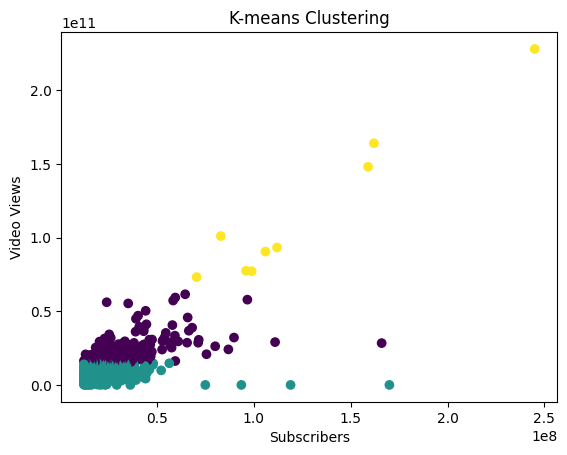

In [76]:
# Custom K-means function
def kmeans(data_cleaned, k, max_iterations=100):
    # Convert the DataFrame to a NumPy array
    data_cleaned = data_cleaned.to_numpy()

    # Initialize centroids randomly
    n_samples, n_features = data_cleaned.shape
    centroids = data_cleaned[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(data_cleaned[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)

        # Update centroids based on the mean of data points in each cluster
        new_centroids = np.array([data_cleaned[clusters == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters

# Load the global YouTube statistics dataset
Global_df = pd.read_csv('Global.csv')

# Select relevant columns for clustering, e.g., subscribers and video views
data = Global_df[['subscribers', 'video views']]

# Specify the number of clusters (k) you determined
k = 3

# Perform K-means clustering using the custom function
clusters = kmeans(data, k)

# Add the cluster labels to the original dataset
Global_df['cluster'] = clusters

# Print the resulting dataset with cluster labels
print(Global_df.head())

# Visualize the clusters
plt.scatter(Global_df['subscribers'], Global_df['video views'], c=clusters, cmap='viridis')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.title('K-means Clustering')
plt.show()


The X-axis represents the Subscribers and the Y-axis represents the Video views. there are three different classes represented by the colours- Purple, yellow and green. these are the prediction classes. so hence we have successfully clustered the data into 3 classifiers which will be used as a classifier for our KNN algorithm.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  created_year  created_month  created_date  \
0           IN          Music  ...        2006.0            Mar        

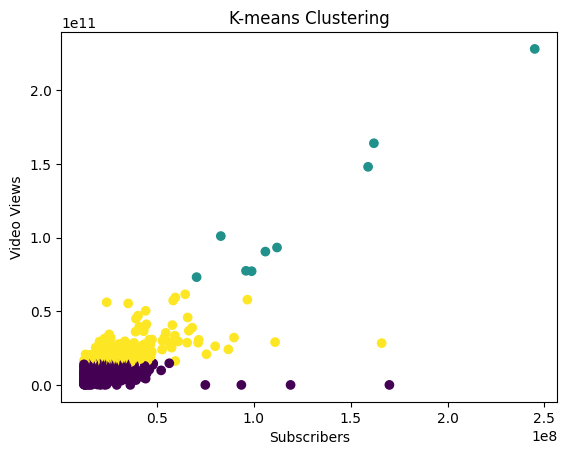

In [77]:
# Load the global YouTube statistics dataset
Global_df = pd.read_csv('Global.csv')

# Select relevant columns for clustering, e.g., subscribers and video views
data_clustering = Global_df[['subscribers', 'video views']]

# Specify the number of clusters (k)
k = 3

# Create a KMeans model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model to the data
kmeans.fit(data_clustering)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataset
Global_df['cluster'] = cluster_labels

# Print the resulting dataset with cluster labels
print(Global_df.head())

# Visualize the clusters
plt.scatter(Global_df['subscribers'], Global_df['video views'], c=cluster_labels, cmap='viridis')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')
plt.title('K-means Clustering')
plt.show()

The X-axis represents the Subscribers and the Y-axis represents the Video views. there are three different classes represented by the colours- Purple, yellow and green. these are the prediction classes. so hence we have successfully clustered the data into 3 classifiers which will be used as a classifier for our KNN algorithm.



sklearn cluster

In [93]:
from sklearn.preprocessing import StandardScaler
numerical_data = Global_df.select_dtypes(include=['number'])

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)

In [109]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select numerical features for clustering
numerical_data = Global_df.select_dtypes(include=['number'])

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
numerical_data_imputed = imputer.fit_transform(numerical_data)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numerical_data_imputed)

# Define the number of clusters (k)
k = 3  # You can adjust the number of clusters as needed

# Create a K-means clustering model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the standardized data
kmeans.fit(data_scaled)

# Add cluster labels to the original DataFrame
Global_df['cluster_label'] = kmeans.labels_

# Now, 'cluster_label' column contains the cluster assignments for each data point

# You can access the cluster centers
cluster_centers = kmeans.cluster_centers_

# To see the cluster assignments for each data point
print(Global_df[['subscribers', 'video views', 'cluster_label']])

# To see the cluster centers
print(cluster_centers)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     subscribers   video views  cluster_label
0      245000000  2.280000e+11              2
1      170000000  0.000000e+00              1
2      166000000  2.836884e+10              2
3      162000000  1.640000e+11              2
4      159000000  1.480000e+11              2
..           ...           ...            ...
990     12300000  9.029610e+09              1
991     12300000  1.674410e+09              0
992     12300000  2.214684e+09              1
993     12300000  3.741235e+08              1
994     12300000  2.129774e+09              0

[995 rows x 3 columns]
[[ 0.11318358 -0.10262763 -0.12930933  0.52418365 -0.33977317 -0.17381138
  -0.32103309 -0.07221163 -0.05400901 -0.05425875 -0.05387558 -0.05405256
  -0.03724845  0.30445311  0.08271411 -1.37791416  1.54192607 -0.94326338
   1.17109715 -0.47760799  1.26504572 -0.13077262]
 [ 0.03039429 -0.07708561 -0.0973155  -0.17252953  0.11834844  0.06605851
   0.11119346 -0.13839194 -0.21395543 -0.2138521  -0.21364007 -0.21393654
  -

# Supervised Clustering

Supervised learning is the process of input and output variables used in training a model and uses labelled data. this type of clustering model supports regression algorithms, classification algorithms, neutral networks. It is less complicated than the unsupervised clustering model. The primary goal of supervised learning is to train the model to predict output when presented with new inputs. A major drawback in the supervised learning is to classify massive and choosing the number of clusters can be subjective in unsupervised learning.

In [78]:
# Select features for classification (e.g., 'feature1', 'feature2', ... 'featureN')
features = ['subscribers']

# Sample data points using actual data from your dataset
data_point = [Global['subscribers'].iloc[0]] # T-Series: Number of Subscribers and Uploads
data_point2 = [166000000, 741]   # MrBeast: Number of Subscribers and Uploads
data_point3 = [162000000, 966]   # Cocomelon: Number of Subscribers and Uploads
data_point4 = [159000000, 116536]  # SET India: Number of Subscribers and Uploads
data_point5 = [106000000, 493]    # Like Nastya: Number of Subscribers and Uploads

# Create a data point as a Python list or NumPy array
your_data_point = [data_point]  # Replace with actual values

# Define the number of neighbors (k) for kNN
k = 5  # You can adjust the value of k

# Create a kNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Extract the features from the DataFrame and use a classification column as labels
X = Global[features].values
y = Global['video views'].values

# Fit the kNN model on the training data
knn.fit(X, y)

# Predict the class label for the data point
predicted_label = knn.predict(your_data_point)

print("Predicted Class Label:", predicted_label)

Predicted Class Label: [2.83688419e+10]


In [103]:
from sklearn.neighbors import KNeighborsClassifier

def predictKNN(k, data_point, dataset, features, classification_column):
    # Create a kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Extract the features from the DataFrame
    X = dataset[features].values

    # Extract the classification labels from the DataFrame
    y = dataset[classification_column].values

    # Fit the kNN model on the training data
    knn.fit(X, y)

    # Predict the class label for the given data point
    predicted_label = knn.predict([data_point])

    return predicted_label

# Define the features and classification column
features = ['subscribers']
classification_column = 'video views'

# Sample data points
data_point = [Global['subscribers'].iloc[0]]  # Use the first data point for testing
data_point2 = [166000000]  # Corrected data point with one feature

# Call the function with different data points and k values
predicted_label1 = predictKNN(k, data_point, Global, features, classification_column)
predicted_label2 = predictKNN(k, data_point2, Global, features, classification_column)


In [104]:
predicted_label1

array([2.83688419e+10])

In [105]:
predicted_label2

array([2.83688419e+10])

# Summary

1. This report presents a comprehensive analysis of the YouTube influencers and the types of content and genre of the channels and their performance metrics. We focus on the subscribers, the views on the channel and the country wise ratings to establish a correlation between these attributes and to identify the patterns and clusters among these attributes enabling an in-depth blueprint for the marketing agencies to make informed decisions regarding the partnerships, collaborations and marketing strategies.

2. In conclusion, this research project aims to equip the Digital marketing agencies with a robust sponsorship strategy for the their clients by leveraging the wealth of data available in the dataset derived from Global Youtube statistics. The ultimate aspiration is to assist the digital marketing agencies in making a sponsorship decision that not only elevates their brand but also contributes to the Online presence and goodwill in the market, fostering a partnership that resonates with audiences worldwide. By adhering to a rigorous and data-driven methodology, this research endeavors to provide digital marketing agencies with a competitive edge in the realm of digital platforms.


3. Continously monitor and analyse the performances of client's campaigns and collabortaions and learn and understand patterns from the reach and the number of likes and views. using the information in this report to make strategies, optimize budget allocation to the highest rating and liked influencer and ensure that there is a high return on investment.

4. Audience Demographic - Analyze the demographics of the audiences from all over the world and collaborate with international influencers that aligns with the targetted audience for the products and services rendered for. This helps in establishing a global dominance of that particular trend like fashion, dance, food articles, music, cinema etc. Also, diversify the geographical reach and expanding the online platform to the regions which couldn't be reached otherwise.

5. Cost-effective collaborations - Channels in the cluster with moderate subscribers and low video views should be considered for cost effective and cheap collaborations in order to reach out a customer base. This kind of an opportunity may provide as a fruitful value to the Agency and help people from all the backgrounds get an equal opportunity.

6. The dendogram plot gives a visual representation of the two key features, "Subscribers" and "Video views". Dendograms allows us to explore the structure of a data and establish relationship within the subset of the data. the threashold line is the highlighted red line which can be adjusted to the user's preference. This signifies where the clusters are found.

7. the agency will provide its clients with data-driven recommendations and enable YouTube marketing campaigns thereby enhancing the quality and reach of the content online, ultimately improving online presence and profit maximization.
This project will help the digital marketing agencies in several ways-
a. 	Identifying the popular content among YouTubers globally
b. 	Tailoring content to attract large audience
c.	Providing insights of the videos and clips i.e- likes, subscribers/followers
d. 	Engaging the audience by user centric content
e.	Categorizing the videos, length of the clip, thereby enabling data-driven decision to boost client’s YouTube performance and generating revenue.

YouTube is a powerful platform for digital marketing, and understanding the landscape of YouTube influencers and the market trends, consumer preferences is essential for our agency. We have analyzed data from 995 YouTubers, taking into account their subscribers and video views, among other features like their geographical location (Country), population, earnings etc.

8. Future Actions to be taken - we can anticipate the next plan of action by using cluster 3 and impliment the targetted marketting strategies with the influencers in cluster 2.

9. Youtube is a platform which has a huge online customer base and can be utilized effectively and efficiently to maximize profit and the clients all over the world for something bigger and better.

10. The digital marketing agencies should focus on the customer's prefrences and should comply with the legalalities in the international space like copyrights, and other intellectual property rights.






# NOTE - source of the codes used above in the project are Stackoverflow, Geek for Geeks and used grammarly for grammer correction.
